## Predicció salut comercial als locals de Barcelona ##

Objectius generals: Analitzar les principals tendències de la ciutat, des de la perspectiva del teixit comercial, Conèixer la vitalitat de la salut comercial i restauració, Inspirar en la formulació de polítiques.

Objectiu concret: Estudi dels locals comercials a Barcelona, enfocat amb algoritmes de classificació supervisada i anàlisis descriptives per monitoritzar la situació i l’evolució de la salut del comerç en planta baixa.  Tenint en compte el context de la ciutat i els indicadors de salut comercial.

Aquests mètodes permetran mesurar i predir l’evolució de certs indicadors econòmics d’interès com si un local estarà actiu, buit o amb una activitat específica (tipus d'activitat, sector). També medir si podria convertir-se en vivenda o predir quina activitat hauria de tenir un local comercial per mantenir un equilibri en tema d'abastiments, necessitats turístiques i restauració,...

També fer comparatives amb bases de dades d'altres anys per veure'n l'evolució, sempre tenint en compte els moviments sociopolítics (canvis demogràfics, pandèmies, guerres,...)

Algoritmes recomanats:
Random Forest: útil per gestionar moltes característiques i fer prediccions sobre l'estat d'activitat o tipus d'activitat.
XGBoost: ideal per a grans volums de dades i per treure informació detallada de les característiques que influeixen més en cada estat o tipus d'activitat.
Regressió logística: si ens interessa predir estats binaris com actiu vs. buit.

Sobre el dataset: 

In [156]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

In [157]:
ruta_archivo = r"C:\Users\thais\Documents\00_MACHINE_LEARNING\PROVA TECNICA DATA SCIENCE\LOCALES.csv"
df_0 = pd.read_csv(ruta_archivo, low_memory=False)
df_0.head()

,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22


In [158]:
for col in df_0.columns:
    print(col)

ID_Global
ID_Bcn_2016
Codi_Principal_Activitat
Nom_Principal_Activitat
Codi_Sector_Activitat
Nom_Sector_Activitat
Codi_Grup_Activitat
Nom_Grup_Activitat
Codi_Activitat_2022
Nom_Activitat
Codi_Activitat_2016
Nom_Local
SN_Oci_Nocturn
SN_Coworking
SN_Servei_Degustacio
SN_Obert24h
SN_Mixtura
SN_Carrer
SN_Mercat
Nom_Mercat
SN_Galeria
Nom_Galeria
SN_CComercial
Nom_CComercial
SN_Eix
Nom_Eix
X_UTM_ETRS89
Y_UTM_ETRS89
Latitud
Longitud
Direccio_Unica
Codi_Via
Nom_Via
Planta
Porta
Num_Policia_Inicial
Lletra_Inicial
Num_Policia_Final
Lletra_Final
Solar
Codi_Parcela
Codi_Illa
Seccio_Censal
Codi_Barri
Nom_Barri
Codi_Districte
Nom_Districte
Referencia_Cadastral
Data_Revisio


In [159]:
df_0.describe()

,ID_Bcn_2016,Codi_Principal_Activitat,Codi_Sector_Activitat,Codi_Grup_Activitat,Codi_Activitat_2022,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Codi_Via,Porta,Num_Policia_Inicial,Num_Policia_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Codi_Districte
count,58019.000000,66088.000000,66088.000000,66088.000000,6.608800e+04,66088.000000,6.608800e+04,66088.000000,66088.000000,66088.000000,63045.000000,66087.000000,66080.000000,65984.000000,65995.000000,65995.000000,66088.000000,66088.000000,66088.000000
mean,41604.459281,0.891357,1.859127,9.314565,2.088482e+06,430216.161921,4.583622e+06,41.401108,2.165168,198961.478650,22.315425,111.508950,112.500953,248327.657659,11.714933,47695.592242,59.814974,28.587051,5.036784
std,21743.719055,0.311193,0.691582,6.531307,2.000116e+06,1813.057666,2.227813e+03,0.020138,0.021571,130999.057107,28.925042,152.019128,149.627018,181510.596868,12.269607,30979.495278,40.244692,22.348009,3.066499
min,4215.000000,0.000000,1.000000,0.000000,1.000000e+01,423799.475627,4.577403e+06,41.344821,2.088023,306.000000,3.000000,0.000000,0.000000,792.000000,1.000000,5010.000000,1.000000,1.000000,1.000000
25%,22656.500000,1.000000,1.000000,2.000000,1.100000e+06,428867.120040,4.581804e+06,41.384713,2.149168,94118.500000,10.000000,17.000000,18.000000,120438.750000,3.000000,20990.000000,28.000000,8.000000,2.000000
50%,41710.000000,1.000000,2.000000,12.000000,1.600102e+06,430271.649691,4.583432e+06,41.399378,2.165895,187207.000000,10.000000,53.000000,54.000000,147243.000000,9.000000,40470.000000,53.000000,25.000000,5.000000
75%,61466.500000,1.000000,2.000000,16.000000,1.700600e+06,431467.576602,4.584965e+06,41.413293,2.180025,288626.500000,20.000000,153.000000,155.000000,306026.000000,16.000000,80570.000000,83.000000,45.000000,8.000000
max,78056.000000,1.000000,3.000000,17.000000,9.000000e+06,434876.705365,4.590873e+06,41.466530,2.220789,701801.000000,900.000000,9999.000000,9999.000000,583998.000000,302.000000,99535.000000,237.000000,73.000000,10.000000


In [160]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   ID_Bcn_2016               58019 non-null  float64
 2   Codi_Principal_Activitat  66088 non-null  int64  
 3   Nom_Principal_Activitat   66088 non-null  object 
 4   Codi_Sector_Activitat     66088 non-null  int64  
 5   Nom_Sector_Activitat      66088 non-null  object 
 6   Codi_Grup_Activitat       66088 non-null  int64  
 7   Nom_Grup_Activitat        66088 non-null  object 
 8   Codi_Activitat_2022       66088 non-null  int64  
 9   Nom_Activitat             66088 non-null  object 
 10  Codi_Activitat_2016       66088 non-null  object 
 11  Nom_Local                 66088 non-null  object 
 12  SN_Oci_Nocturn            66088 non-null  object 
 13  SN_Coworking              66088 non-null  object 
 14  SN_Ser

# 1. Anàlisi Descriptiva Inicial #

### 1. Estructura del DataFrame ###
El conjunt de dades consta de 66.088 registres amb 49 columnes. De les columnes disponibles, algunes contenen dades numèriques, altres són de tipus objecte (cadenes de text) i també hi ha columnes amb valors nuls.

### 2. Descripció general de les columnes ###
A continuació, es proporciona una descripció general de les columnes clau i les seves característiques:
ID_Global: Identificador únic per cada registre.   
ID_Bcn_2016: Identificador de l'activitat a la ciutat de Barcelona (algunes files tenen valors nuls).   
Codi_Principal_Activitat, Codi_Sector_Activitat, Codi_Grup_Activitat, Codi_Activitat_2022: Còdigs que identifiquen la categoria i subcategoria de l'activitat econòmica del local. Aquests valors són numèrics i els agruparem per analitzar l'activitat comercial.  
Nom_Principal_Activitat, Nom_Sector_Activitat, Nom_Grup_Activitat, Nom_Activitat: Noms que descriuen les activitats comercials i el seu sector. Són columnes de tipus objecte (cadenes de text).  

Coordenades geogràfiques (Latitud, Longitud): Permeten la geolocalització dels establiments.    
Ubicació (Codi_Via, Nom_Via, Codi_Barri, Nom_Barri, Codi_Districte, Nom_Districte): Dades sobre la localització i districte del local.
Altres dades de localització i estructurals (Planta, Porta, Num_Policia_Inicial, Num_Policia_Final): Dades relacionades amb la localització específica del local dins de l'edifici i la seva identificació legal.  

Tipus d'establiment (p. ex., SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio): Dades categòriques per identificar si un local té característiques especials (oci nocturn, coworking, etc.).   

### 3. Estadístiques Descriptives Generals ###  
Les següents estadístiques es basen en les columnes numèriques de les dades:  
ID_Bcn_2016: Els valors de l'ID_Bcn_2016 varien entre 4215 i 78056, però no els utilitzarem degut al gran nombre de valors faltants i ja tenim un altra ID únic.  

Coordenades UTM (X_UTM_ETRS89, Y_UTM_ETRS89), Latitud i Longitud: Les coordenades UTM tenen valors molt específics que ajuden a identificar les ubicacions a la ciutat de Barcelona.

Codi_Via i Porta: Aquestes columnes ofereixen la informació sobre les vies i les portes dels locals. Tanmateix, la columna de "Porta" té alguns valors nuls, que gestionarem posteriorment.

Solar, Codi_Parcela, Codi_Illa: Són codis utilitzats per identificar el solar i la parcel·la associada a cada local. 
Num_Policia_Inicial, Num_Policia_Final: Aquestes columnes mostren els rangs d'adreça per número de policia. ens poden orientar millor que el num porta.

### 4. Manca de Dades i valors nuls ### 
Algunes columnes contenen valors nuls en una proporció significativa de les files:   

Nom_Mercat: Aquesta columna conté només 2.154 valors no nuls, mentre que la resta estan nuls. Això pot indicar que només una part dels establiments estan en mercats.   
Nom_Galeria i Nom_CComercial: Similarment, aquestes columnes tenen valors nuls en moltes files, però no necessitem aquestes variables per l'estudi.   
Porta, Num_Policia_Inicial, Num_Policia_Final: Algunes d'aquestes dades tenen valors nuls, manca d'una identificació precisa en determinades ubicacions.

El conjunt de dades conté algunes columnes amb una proporció relativament alta de valors nuls. És important netejar o imputar aquests valors abans de continuar amb l'anàlisi. Les columnes s'han de revisar.

### 5. Tipus de Dades ###
Dades numèriques: Aquests inclouen les coordenades UTM, latitud, longitud, així com algunes altres dades d’identificació com el Codi_Via.   
Dades de text: Els noms de les activitats, sectors, grups d'activitat i altres elements descriptius.   
Dades booleanes: Dades com SN_Oci_Nocturn, SN_Coworking, SN_Servei_Degustacio indiquen la presència o absència de característiques específiques dels locals. 

In [161]:
(df_0.isna().sum().sum(), df_0.isnull().sum().sum(), df_0.loc[df_0.duplicated()].sum().sum())


# Contar valores nulos por columna
nulos_por_columna = df_0.isnull().sum()

# Mostrar columnas con valores nulos
print(nulos_por_columna[nulos_por_columna > 0])


ID_Bcn_2016              8069
Nom_Mercat              63934
Nom_Galeria             65774
Nom_CComercial          65245
Nom_Eix                 45406
Porta                    3043
Num_Policia_Inicial         1
Lletra_Inicial          64026
Num_Policia_Final           8
Lletra_Final            64126
Solar                     104
Codi_Parcela               93
Codi_Illa                  93
Referencia_Cadastral       93
dtype: int64


# 2. Neteja inicial del DataFrame #

En el procés de neteja, podem considerar prescindir de les columnes amb una quantitat elevada de valors nuls sempre i quant no siguin rellevants per l'anàlisi: 

### Columnes amb gairebé tots els valors nuls: ### 

Nom_Galeria: Té 65,774 valors nuls de 66,088 files. No necessitem aquesta informació per l'estudi.  
Nom_CComercial: Té 65,245 valors nuls. No necessitem aquesta informació per l'estudi.  
Lletra_Inicial i Lletra_Final: Aquestes dues columnes tenen més de 64,000 valors nuls cadascuna. No necessitem aquesta precisió en l’adreça de l’establiment.  
### Columnes amb presència limitada de dades específiques: ###

Nom_Mercat: Amb 63,934 valors nuls, no és necessari tenir el nom específic dels mercats per als establiments, doncs l'estudi serà més global per barris i districtes.     
Nom_Eix: Aquesta columna dóna informació adicional però tenin la posició geogràfica i tenint tants valors nuls, millor excloure-la, ja que té 45,406 valors nuls.  

### Columnes amb valors geoespacials duplicats o opcionalment prescindibles: ###

Porta: No és necessari per a l’anàlisi de la ubicació exacta de cada establiment.
Solar, Codi_Parcela, Codi_Illa, Referencia_Cadastral: Aquestes són molt específiques per identificar. Si ens hagués fallat l'ID únic, haguéssim hagut potser d'utilitzar-les, doncs per exempla la referència cadastrals és única. Però com no és el cas, l'eliminarem.  

### Columnes amb gairebé cap valor nul però que podrien no ser crítiques segons l’anàlisi: ###

ID_Bcn_2016: Tot i que és un identificador, l'exclourem, ja es té ID_Global com a identificador únic.
Num_Policia_Inicial i Num_Policia_Final: Són útils per a la identificació exacta de la direcció, però no necessitem tanta precisió. 

In [162]:
# Còpia del DataFrame sense les columnes que es volen eliminar
columns_to_drop = [
    'ID_Bcn_2016','Nom_Galeria', 'Nom_CComercial', 'Lletra_Inicial', 'Lletra_Final', 
    'Nom_Mercat', 'Nom_Eix', 'Porta', 'Solar', 'Codi_Parcela', 
    'Codi_Illa', 'Referencia_Cadastral'
]

df_net = df_0.drop(columns=columns_to_drop)
df_net.head()

,ID_Global,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,Codi_Activitat_2016,...,Nom_Via,Planta,Num_Policia_Inicial,Num_Policia_Final,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,1600102,...,ABAT ODÓ,LOC,20.0,20.0,47,60,Sant Andreu,9,Sant Andreu,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,9000,...,ABAT ODÓ,LOC,22.0,22.0,47,60,Sant Andreu,9,Sant Andreu,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,...,ABAT ODÓ,LOC,23.0,25.0,47,60,Sant Andreu,9,Sant Andreu,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,9000,...,ABAT ODÓ,LOC,38.0,40.0,47,60,Sant Andreu,9,Sant Andreu,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,...,ABAT ODÓ,LOC,42.0,42.0,47,60,Sant Andreu,9,Sant Andreu,2021-06-22


In [163]:
# Contar valores nulos por columna
nulos_por_columna = df_net.isnull().sum()

# Mostrar columnas con valores nulos
print(nulos_por_columna[nulos_por_columna > 0])

Num_Policia_Inicial    1
Num_Policia_Final      8
dtype: int64


In [164]:
# Identificar les files on qualsevol de les dues columnes és nul·la
files_nuls_any = df_net[df_net['Num_Policia_Inicial'].isnull() | df_net['Num_Policia_Final'].isnull()]
files_nuls_any

,ID_Global,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,Codi_Activitat_2016,...,Nom_Via,Planta,Num_Policia_Inicial,Num_Policia_Final,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Data_Revisio
11566,fbb619f7-49ae-40cb-aa1f-1817e3a91278,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",1400001,Bars / CIBERCAFÈ,1400001,...,CASP,LOC,33.0,NaN,76,7,la Dreta de l'Eixample,2,Eixample,2021-03-01
11567,4b21b339-7b52-4620-aa0a-8e065757fac2,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,...,CASP,LOC,33.0,NaN,76,7,la Dreta de l'Eixample,2,Eixample,2021-03-01
19136,6c6af452-2b15-4f95-bd35-084eba4c9ff5,1,Actiu,2,Serveis,15,Sanitat i assistència,1500000,Sanitat i assistència,15000,...,RAMON TURRÓ,LOC,185.0,NaN,61,68,el Poblenou,10,Sant Martí,2021-05-26
19922,330d4e41-029a-4673-95b9-56e016e4a3f5,1,Actiu,2,Serveis,16,Altres,1600600,Perruqueries,16006,...,ESCORIAL,LOC,NaN,NaN,63,31,la Vila de Gràcia,6,Gràcia,2021-03-05
29306,c583b14b-d3df-4242-82e3-497ed55e99ad,1,Actiu,2,Serveis,16,Altres,1600000,Pàrquings i garatges,16000,...,G.V. CORTS CATALANES,LOC,638.0,NaN,77,7,la Dreta de l'Eixample,2,Eixample,2021-03-01
46779,150ed753-c9df-4e15-bbc1-3aa7da8d3668,1,Actiu,2,Serveis,13,Reparacions (Electrodomèstics i automòbils),1300000,Reparacions (Electrodomèstics i automòbils),13000,...,PUJADES,LOC,7268.0,NaN,43,66,el Parc i la Llacuna del Poblenou,10,Sant Martí,2022-06-20
48865,fac4a171-b2b0-4fa5-b595-bccbaf4b802f,1,Actiu,1,Comerç al detall,1,Quotidià alimentari,1006000,"Pa, pastisseria i làctics",1006,...,ROCAFORT,LOC,58.0,NaN,159,10,Sant Antoni,2,Eixample,2021-03-17
59918,f807ebdb-bb98-483f-93fa-148ba23dac38,1,Actiu,3,Altres,17,Altres,1700600,Activitats de la construcció,17006,...,PG URRUTIA,LOC,90.0,NaN,39,46,el Turó de la Peira,8,Nou Barris,2021-07-20


In [165]:
# Contar valores nulos por columna
nulos_por_columna = df_net.isnull().sum()
print(nulos_por_columna[nulos_por_columna > 0])

Num_Policia_Inicial    1
Num_Policia_Final      8
dtype: int64


In [166]:
df_0.loc[19922].T # busco el valor catastral o porta per omplir el valor faltant manualment

ID_Global                   330d4e41-029a-4673-95b9-56e016e4a3f5
ID_Bcn_2016                                              30886.0
Codi_Principal_Activitat                                       1
Nom_Principal_Activitat                                    Actiu
Codi_Sector_Activitat                                          2
Nom_Sector_Activitat                                     Serveis
Codi_Grup_Activitat                                           16
Nom_Grup_Activitat                                        Altres
Codi_Activitat_2022                                      1600600
Nom_Activitat                                       Perruqueries
Codi_Activitat_2016                                        16006
Nom_Local                                              EL BARBER
SN_Oci_Nocturn                                                No
SN_Coworking                                                  No
SN_Servei_Degustacio                                          No
SN_Obert24h              

In [167]:
df_net.loc[19922, 'Num_Policia_Inicial'] = 10
df_net.loc[19922, 'Num_Policia_Final'] = 10

In [168]:
# convertir a int esl 0/1 de les variables que ara mateix són objecte 
cols_01 = ['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura',
        'SN_Carrer', 'SN_Mercat', 'SN_Galeria', 'SN_CComercial', 'SN_Eix']

for col in cols_01:
    df_net[col] = df_net[col].map({'Sí': 1, 'No': 0})  # Substituir 'Sí' per 1 i 'No' per 0


In [169]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Global                 66088 non-null  object 
 1   Codi_Principal_Activitat  66088 non-null  int64  
 2   Nom_Principal_Activitat   66088 non-null  object 
 3   Codi_Sector_Activitat     66088 non-null  int64  
 4   Nom_Sector_Activitat      66088 non-null  object 
 5   Codi_Grup_Activitat       66088 non-null  int64  
 6   Nom_Grup_Activitat        66088 non-null  object 
 7   Codi_Activitat_2022       66088 non-null  int64  
 8   Nom_Activitat             66088 non-null  object 
 9   Codi_Activitat_2016       66088 non-null  object 
 10  Nom_Local                 66088 non-null  object 
 11  SN_Oci_Nocturn            66088 non-null  int64  
 12  SN_Coworking              66088 non-null  int64  
 13  SN_Servei_Degustacio      66088 non-null  int64  
 14  SN_Obe

In [170]:
# Comprovar duplicats
df_net.duplicated().sum()

0

In [171]:
df_net['Planta'].unique()

array(['LOC'], dtype=object)

In [172]:
df_net['Data_Revisio'].unique()

array(['2021-06-22', '2021-05-03', '2021-10-08', '2022-07-15',
       '2021-01-27', '2022-04-07', '2022-07-18', '2022-04-14',
       '2022-04-19', '2022-04-20', '2022-03-01', '2022-03-02',
       '2022-03-03', '2019-05-27', '2021-06-07', '2022-05-12',
       '2022-08-03', '2022-08-02', '2021-05-12', '2021-12-03',
       '2022-05-16', '2022-02-17', '2021-12-20', '2022-03-10',
       '2021-08-10', '2022-04-12', '2021-06-09', '2022-06-14',
       '2022-06-13', '2021-06-10', '2022-03-18', '2022-03-21',
       '2022-03-28', '2022-09-06', '2021-09-20', '2021-09-15',
       '2022-04-05', '2021-10-01', '2021-07-06', '2021-11-18',
       '2022-09-07', '2022-06-17', '2022-07-01', '2022-06-23',
       '2022-06-20', '2022-01-27', '2022-03-07', '2022-03-08',
       '2022-04-11', '2021-11-16', '2022-03-14', '2022-09-09',
       '2022-04-06', '2022-08-12', '2022-08-11', '2022-07-19',
       '2021-04-21', '2022-07-08', '2022-05-18', '2021-07-14',
       '2019-06-14', '2021-03-23', '2022-03-17', '2022-

In [173]:
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'])# Suposant que la columna es diu 'data' i és de tipus datetime
df_net['Data_Revisio'] = df_net['Data_Revisio'] .dt.strftime('%d-%m-%Y')


In [174]:
df_net['Data_Revisio'].unique()

array(['22-06-2021', '03-05-2021', '08-10-2021', '15-07-2022',
       '27-01-2021', '07-04-2022', '18-07-2022', '14-04-2022',
       '19-04-2022', '20-04-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '27-05-2019', '07-06-2021', '12-05-2022',
       '03-08-2022', '02-08-2022', '12-05-2021', '03-12-2021',
       '16-05-2022', '17-02-2022', '20-12-2021', '10-03-2022',
       '10-08-2021', '12-04-2022', '09-06-2021', '14-06-2022',
       '13-06-2022', '10-06-2021', '18-03-2022', '21-03-2022',
       '28-03-2022', '06-09-2022', '20-09-2021', '15-09-2021',
       '05-04-2022', '01-10-2021', '06-07-2021', '18-11-2021',
       '07-09-2022', '17-06-2022', '01-07-2022', '23-06-2022',
       '20-06-2022', '27-01-2022', '07-03-2022', '08-03-2022',
       '11-04-2022', '16-11-2021', '14-03-2022', '09-09-2022',
       '06-04-2022', '12-08-2022', '11-08-2022', '19-07-2022',
       '21-04-2021', '08-07-2022', '18-05-2022', '14-07-2021',
       '14-06-2019', '23-03-2021', '17-03-2022', '08-02

In [175]:
# Revisar les categories úniques de les columnes de text
df_net['Nom_Barri'].unique()

array(['Sant Andreu', 'Sarrià', 'el Raval', 'Pedralbes',
       'Sant Pere, Santa Caterina i la Ribera', 'el Baix Guinardó',
       'el Congrés i els Indians', 'el Clot', 'el Bon Pastor',
       'la Marina del Prat Vermell', 'Sant Gervasi - Galvany',
       'el Barri Gòtic', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Guinardó',
       'Sant Martí de Provençals', 'Provençals del Poblenou', 'el Carmel',
       'Ciutat Meridiana', 'Hostafrancs', "la Font d'en Fargues",
       'les Corts', 'la Trinitat Nova',
       'el Parc i la Llacuna del Poblenou',
       'la Vila Olímpica del Poblenou', 'la Vila de Gràcia',
       'el Poble Sec', 'Can Baró', 'la Salut',
       'Vallvidrera, el Tibidabo i les Planes', 'les Roquetes',
       'la Maternitat i Sant Ramon', 'Sants',
       'Sant Gervasi - la Bonanova', 'Porta', 'Sant Antoni', 'el Coll',
       "el Camp d'en Grassot i Gràcia Nova",
       'Vilapicina i la Torre Llobeta', 'el Besòs i el Maresme',
       "la Dreta de l'Ei

In [176]:
# Revisar les categories úniques de les columnes de text
df_net['Nom_Districte'].unique()

array(['Sant Andreu', 'Sarrià-Sant Gervasi', 'Ciutat Vella', 'Les Corts',
       'Horta-Guinardó', 'Sant Martí', 'Sants-Montjuïc', 'Gràcia',
       'Nou Barris', 'Eixample'], dtype=object)

In [179]:
# Revisar les columnes booleanes per revisar que estiguin correctes
df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio','SN_Obert24h','SN_Mixtura','SN_Carrer','SN_Mercat','SN_Galeria','SN_CComercial','SN_Eix']].apply(lambda x: x.unique())

,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,SN_Mercat,SN_Galeria,SN_CComercial,SN_Eix
0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1


In [180]:
# Revisar les coordenades UTM per comprobar que no hi ha dades incoherents
df_net[['X_UTM_ETRS89', 'Y_UTM_ETRS89']].describe()

,X_UTM_ETRS89,Y_UTM_ETRS89
count,66088.000000,6.608800e+04
mean,430216.161921,4.583622e+06
std,1813.057666,2.227813e+03
min,423799.475627,4.577403e+06
25%,428867.120040,4.581804e+06
50%,430271.649691,4.583432e+06
75%,431467.576602,4.584965e+06
max,434876.705365,4.590873e+06


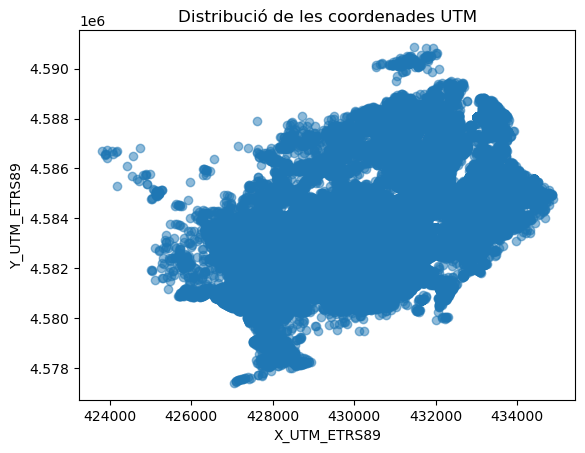

In [181]:
# visualització de les coordenades
plt.scatter(df_net['X_UTM_ETRS89'], df_net['Y_UTM_ETRS89'], alpha=0.5)
plt.title("Distribució de les coordenades UTM")
plt.xlabel("X_UTM_ETRS89")
plt.ylabel("Y_UTM_ETRS89")
plt.show()

In [182]:
# !pip install pyproj

### Visualització de les correlacions numèriques tot i saber que en aquest dataframe prevaleixen les categòriques, doncs les numèriques només són referències d'ubicació o d'activitat: ###

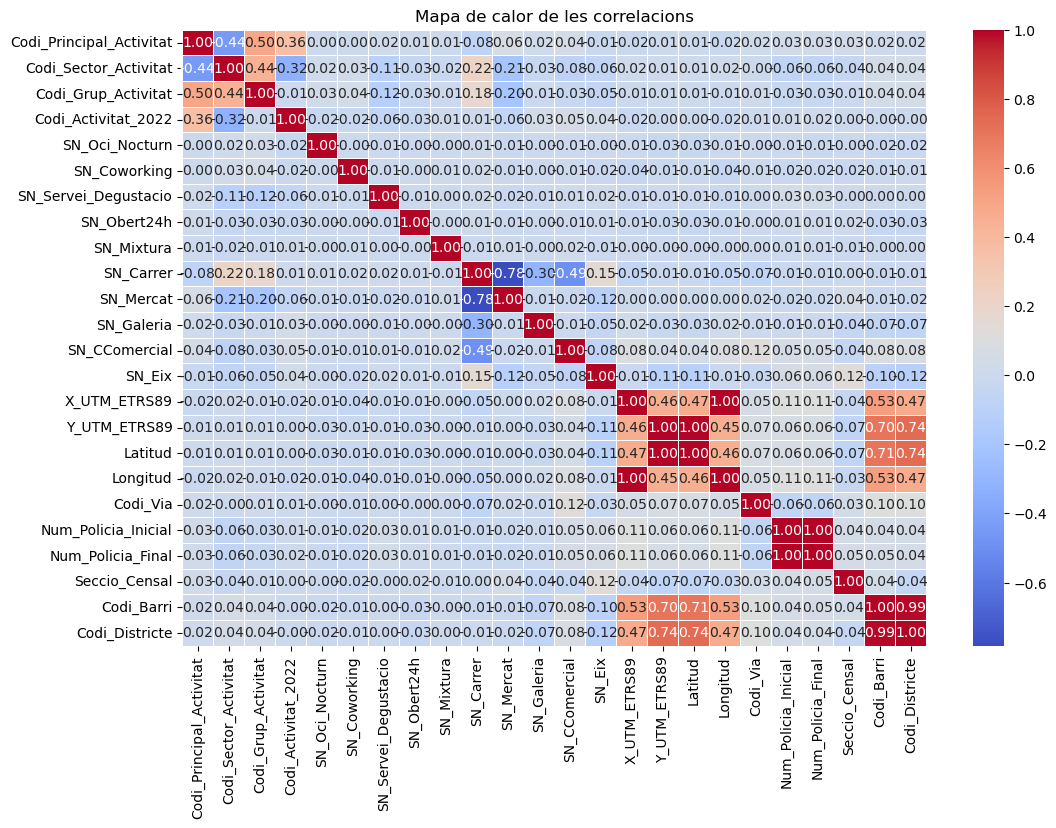

In [183]:
# Crear un mapa de calor de les correlacions
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de les correlacions')
plt.show()

_Només veiem correlacions llògiques com codi barri amb codi districte, o num inici i fi del carrer, i les de ubicació. Així que no tenim cap informació rellevant._

# 3. Primeres Visualitzacions EDA #

## 3.1. Distribució d'Establiments per Sector i Grup d'Activitat ##

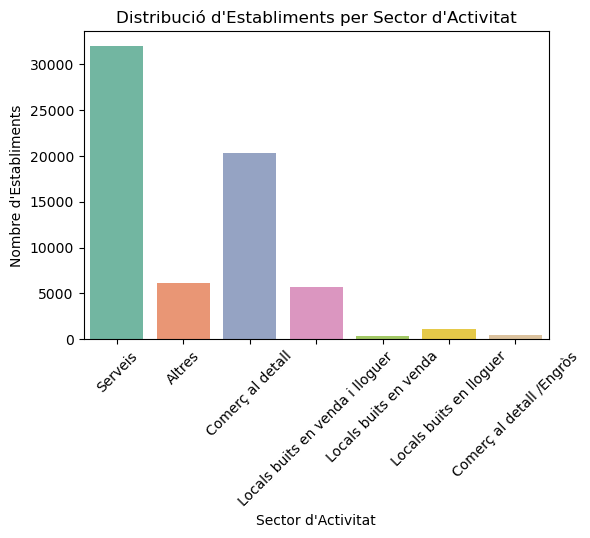

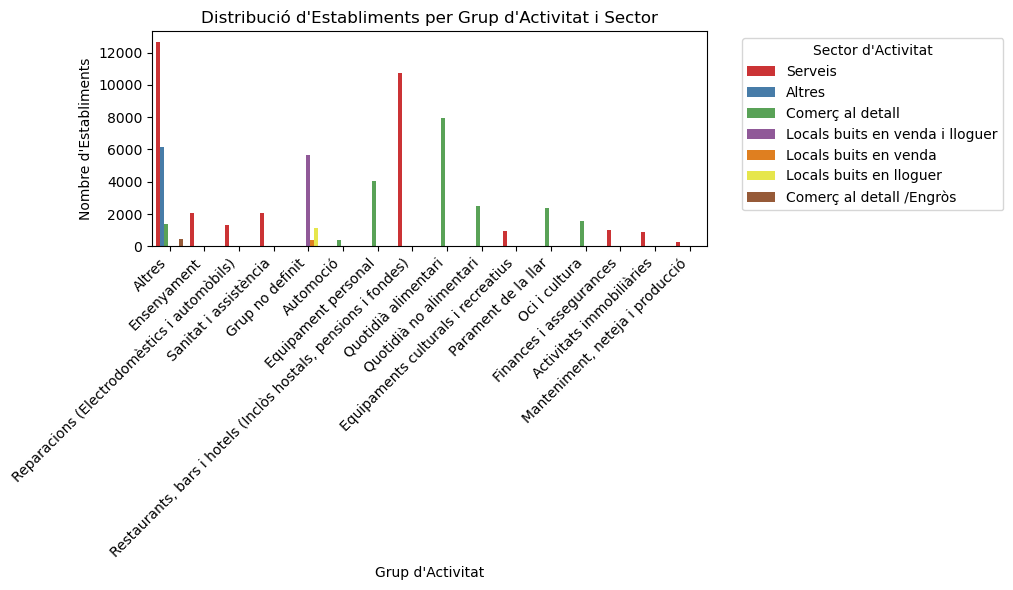

In [185]:
# Gràfica de barres per Nom_Sector_Activitat
plt.figure(figsize=(6,4))
sns.countplot(x='Nom_Sector_Activitat', data=df_net, palette='Set2')
plt.title('Distribució d\'Establiments per Sector d\'Activitat')
plt.xlabel('Sector d\'Activitat')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Gràfica de barres per Nom_Grup_Activitat dins de cada sector
plt.figure(figsize=(10,6))
sns.countplot(x='Nom_Grup_Activitat', hue='Nom_Sector_Activitat', data=df_net, palette='Set1')
plt.title('Distribució d\'Establiments per Grup d\'Activitat i Sector')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Nombre d\'Establiments')

# Ajustar les etiquetes de la barra X per evitar el solapament
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes a 45 graus i ajustar l'alineació horitzontal
plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar el layout per evitar que es tallin les etiquetes
plt.show()



_Aquests gràfics de barres mostren com el sector de serveis és el que compta amb més número d'establiments, precedit pel comerç al detall. En el segon gràfic, observem a quin sector pertanyen les activitats i amb quina quantitat d'establiments._

## 3.2. Distribució Geogràfica d'Establiments Actius per Districte i Barri ##

### Gràfica de barres per districte i barri: ###

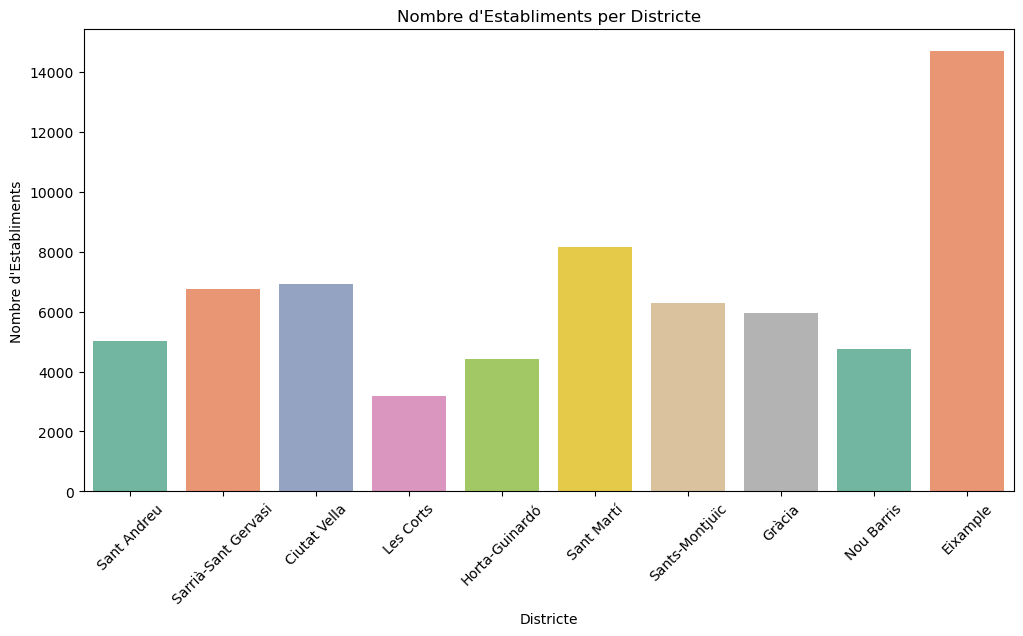

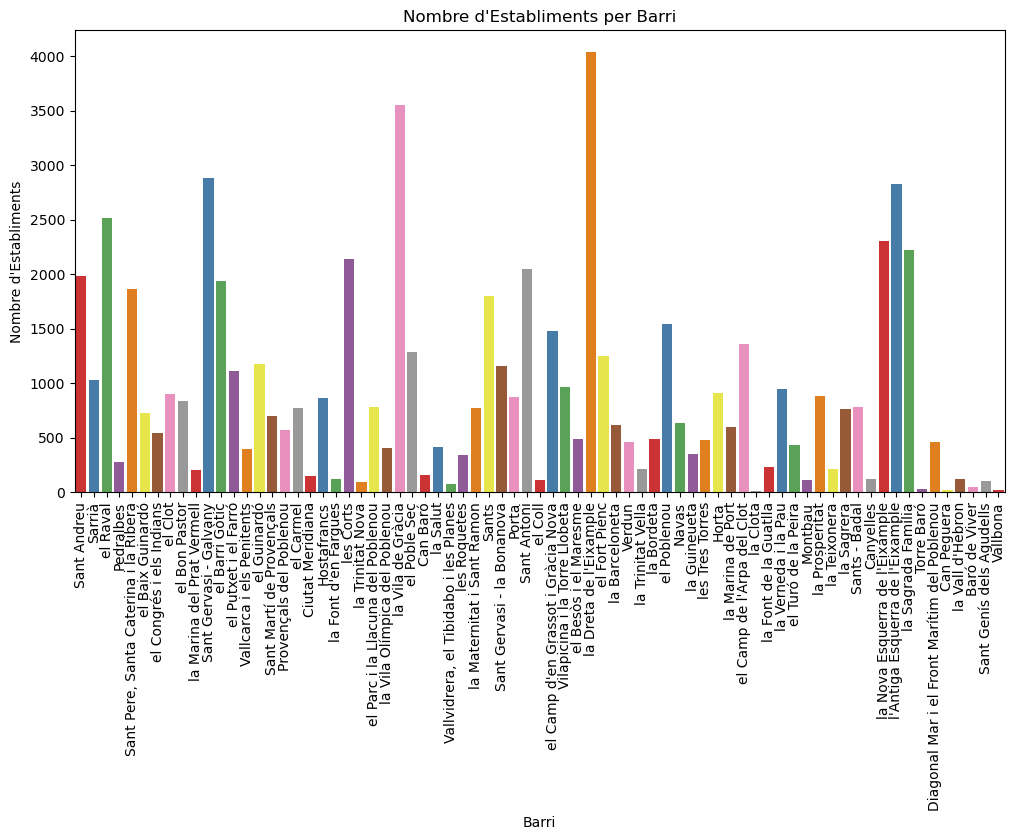

In [46]:
# Gràfica de barres per Nom_Districte
plt.figure(figsize=(12, 6))
sns.countplot(x='Nom_Districte', data=df_net, palette='Set2')
plt.title('Nombre d\'Establiments per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Gràfica de barres per Nom_Barri
plt.figure(figsize=(12, 6))
sns.countplot(x='Nom_Barri', data=df_net, palette='Set1')
plt.title('Nombre d\'Establiments per Barri')
plt.xlabel('Barri')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_El districte on es concentren la majoria d'establiments és L'Eixample, contemplant els barris de la mateixa Eixample, seguint per Sagrada Familia, Gràcia, les Corts, Sant Gervasi i barri Gòtic._

### Comparativa de Tipus d'Establiments (Oci, Coworking, Degustació, etc.) ###
Per mostrar quins serveis estan presents en cada grup o districte.


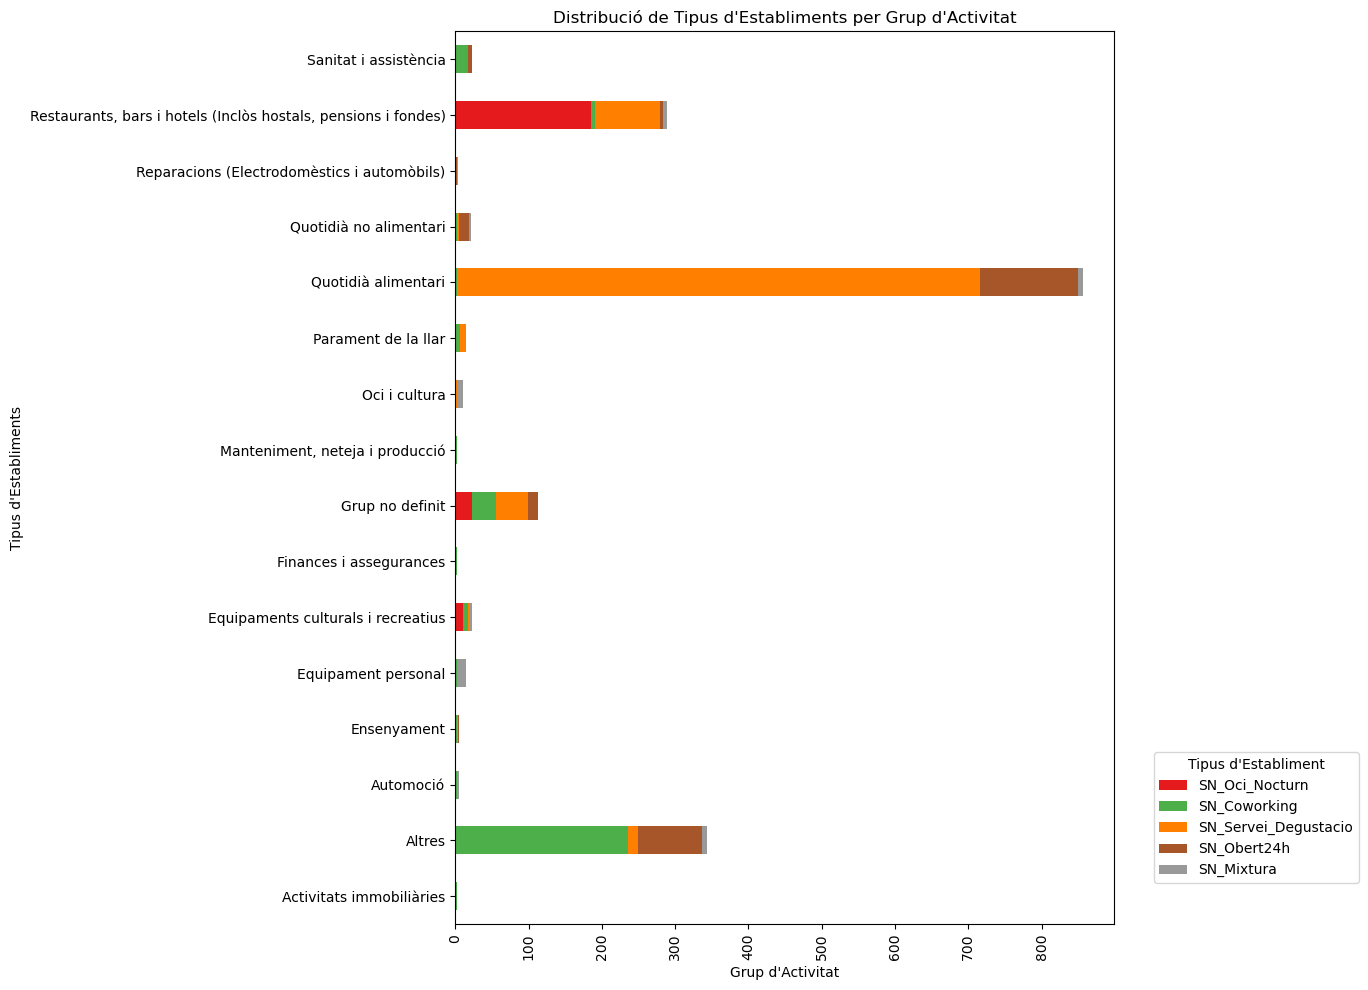

In [120]:
# Seleccionar les variables de tipus d'establiment
df_types = df_net[['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 
                   'SN_Obert24h', 'SN_Mixtura']]

# Agrupar per grup d'activitat
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat']).sum()

# Crear la gràfica de barres apilades
df_types_grouped.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='Set1')

# Personalitzar la gràfica
plt.title('Distribució de Tipus d\'Establiments per Grup d\'Activitat')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Tipus d\'Establiments')
plt.xticks(rotation=90)
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.2), loc='upper left')
# Mostrar la gràfica
plt.tight_layout()
plt.show()

_Podem observar que dins dels tipus d'establiments, tenim gran quantitat de coworkings en la secció altres, dels quals alguns oberts 24h. També podem comprobar que dins de la secció d'alimentari, molts són amb servei només de degustació (segurament els que no tenien sortida de fums i no han obtingut la licència de restaurant i molts forns, que ja sabem que han estat en tendència en els últims anys).  Dins de la secció de bars i hotels, trobem molts amb permís d'oci nocturn, sobretot hotels i alguns bars i restaurants._


### Comparativa per ubicació d'Establiments carrer, centre comercial, mercat, etc.) ###
Per mostrar la ubicació del local

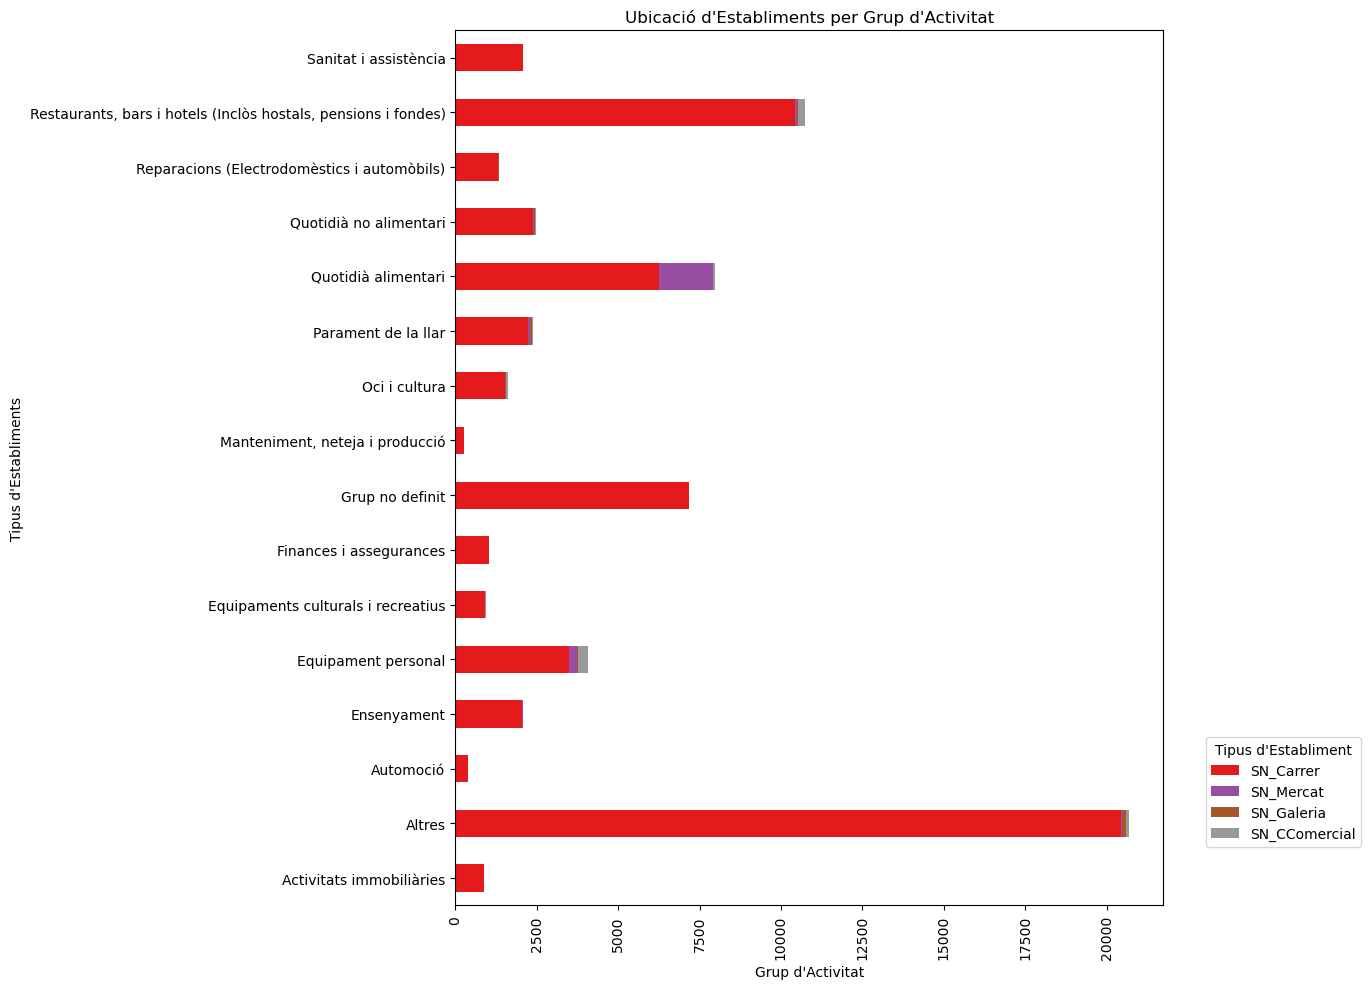

In [124]:
# Seleccionar les variables de tipus d'establiment
df_types = df_net[['SN_Carrer', 'SN_Mercat', 'SN_Galeria', 
                   'SN_CComercial']]

# Agrupar per grup d'activitat
df_types_grouped = df_types.groupby(df_net['Nom_Grup_Activitat']).sum()

# Crear la gràfica de barres apilades
df_types_grouped.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='Set1')

# Personalitzar la gràfica
plt.title('Ubicació d\'Establiments per Grup d\'Activitat')
plt.xlabel('Grup d\'Activitat')
plt.ylabel('Tipus d\'Establiments')
plt.xticks(rotation=90)
plt.legend(title='Tipus d\'Establiment', bbox_to_anchor=(1.05, 0.2), loc='upper left')
# Mostrar la gràfica
plt.tight_layout()
plt.show()

_Podem comprobar que la majoria de locals de l'estudi realitzat, es troven a peu de carrer_

### Principals Categories d'Activitat (Top 20) ###

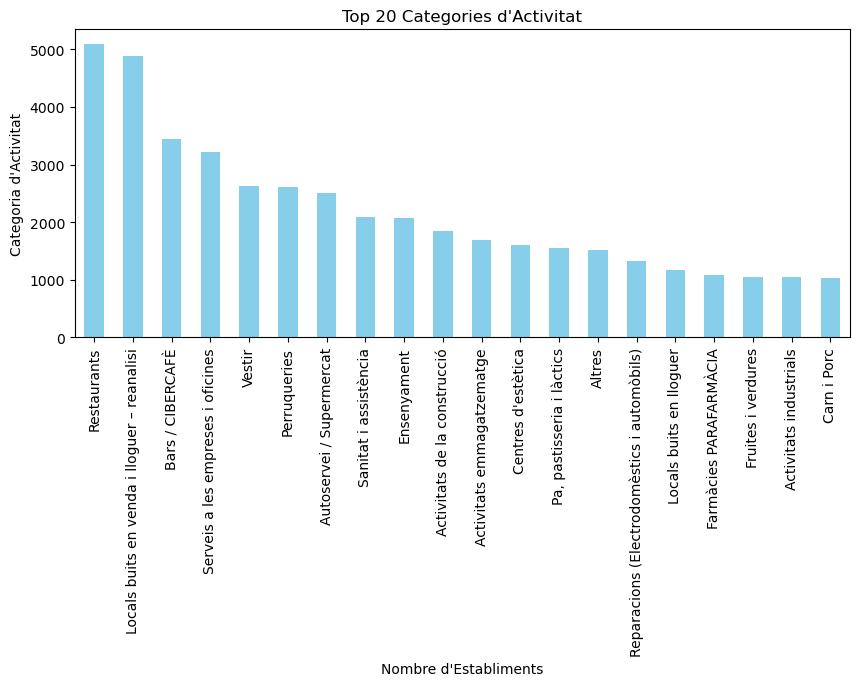

In [149]:
# Obtenir les 10 activitats més comunes
top_10_activitats = df_net['Nom_Activitat'].value_counts().head(20)

# Gràfica de barres per les top 10 activitats
plt.figure(figsize=(10, 4))
top_10_activitats.plot(kind='bar', color='skyblue')
plt.title('Top 20 Categories d\'Activitat')
plt.ylabel('Categoria d\'Activitat')
plt.xlabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_Simplement, observem en aquest gràfic, la distribució de les primeres 20 categories d'activitat, destacant entre elles els restaurants i bars, seguit d'oficines, tendes de roba.... i altres activitats, bastant proporcionades._

### Índex d'Abastiment Comercial per Districte i Barri ###

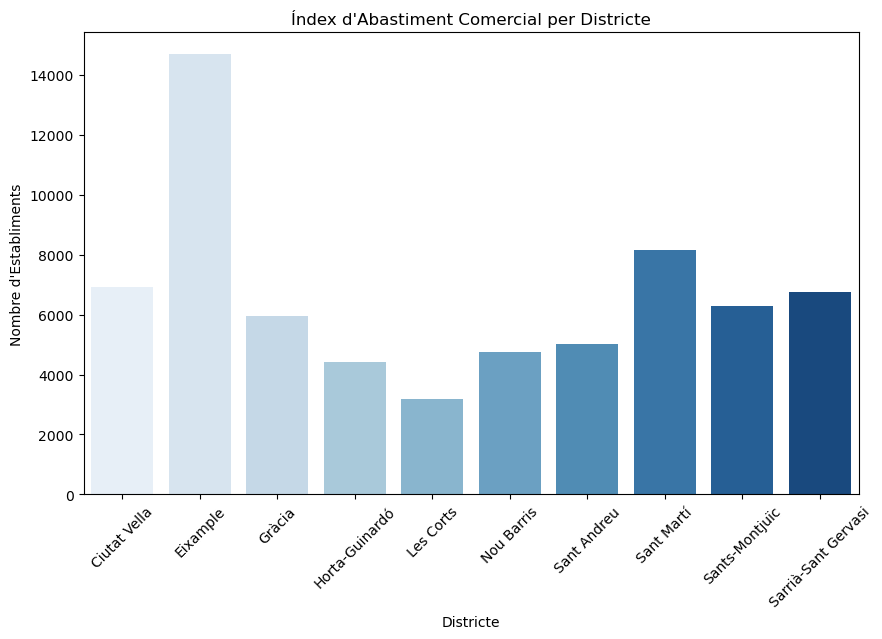

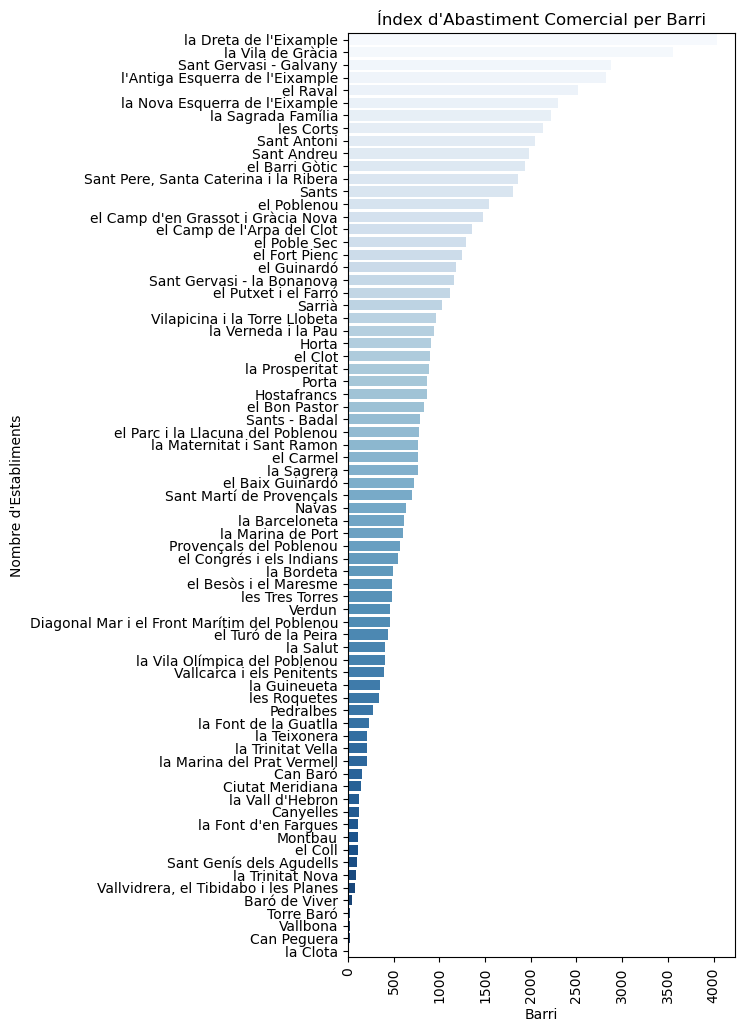

In [145]:
# Agrupar per districte i barri per obtenir el nombre d'establiments
districte_abastiment = df_net.groupby('Nom_Districte').size()
barri_abastiment = df_net.groupby('Nom_Barri').size()

# Mapa temàtic de densitat per districte
plt.figure(figsize=(10, 6))
sns.barplot(x=districte_abastiment.index, y=districte_abastiment.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Districte')
plt.xlabel('Districte')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.show()

# Ordenar els barris per nombre d'establiments de més a menys
barri_abastiment_sorted_desc = barri_abastiment.sort_values(ascending=False)

plt.figure(figsize=(5, 12))
sns.barplot(y=barri_abastiment_sorted_desc.index, x=barri_abastiment_sorted_desc.values, palette='Blues')
plt.title('Índex d\'Abastiment Comercial per Barri')
plt.xlabel('Barri')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=90)
plt.show()


_Així com en el primer gràfic podem contemplar, tot i les diferències per districtes, una distribució bastant equilibrada d'abastiment comercial, podem observar en el segon gràfic, com alguns barris, tenen índex molt baixos. Tot i que també hauriem de tenir en compte el tamany de cada barri i la densitat demogràfica._

### Evolució Temporal de l'Estat d'Activitat ###

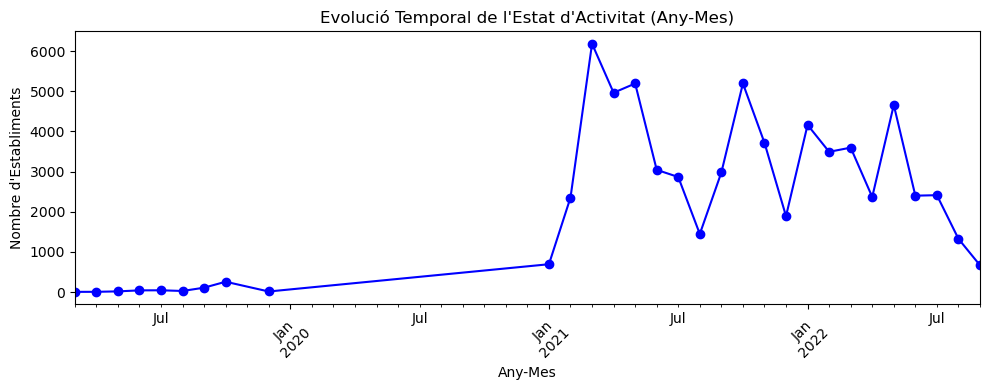

In [79]:
# Convertir 'Data_Revisio' a datetime si no s'ha fet abans
df_net['Data_Revisio'] = pd.to_datetime(df_net['Data_Revisio'])

# Agrupar per any i mes
df_net['Any_Mes'] = df_net['Data_Revisio'].dt.to_period('M')

# Calcular el nombre d'establiments per cada mes i any
evolucio_mensual = df_net.groupby('Any_Mes').size()

# Graficar l'evolució temporal dels establiments per mes i any
plt.figure(figsize=(10, 4))
evolucio_mensual.plot(kind='line', marker='o', color='blue')
plt.title('Evolució Temporal de l\'Estat d\'Activitat (Any-Mes)')
plt.xlabel('Any-Mes')
plt.ylabel('Nombre d\'Establiments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


_Aquest gràfic mostra el canvi post-pandèmia, després de la inactivitat, mostrant un moment molt important amb l'inici d'activitat, però també mostra que cada cop, hi ha més tendència a finalitzar-la. Motiu pel qual és tant important aquest estudi._

In [74]:
df_0['Codi_Principal_Activitat'].unique()

array([1, 0], dtype=int64)

In [75]:
df_net['Nom_Principal_Activitat'].value_counts()


Nom_Principal_Activitat
Actiu                        58908
Sense activitat Econòmica     7180
Name: count, dtype: int64

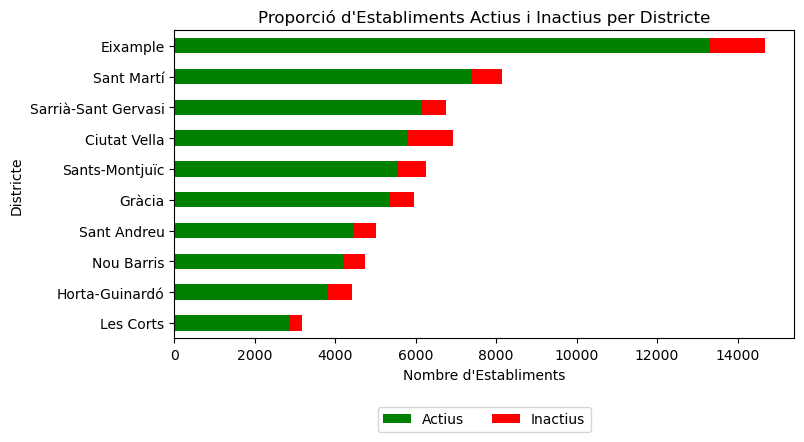

In [111]:
# Graficar barres horitzontals apilades proporció locals inactius/actius
ax = df_proporcio.sort_values(by='Actius').plot(kind='barh', stacked=True, figsize=(8, 4), color=['green', 'red'])

plt.title('Proporció d\'Establiments Actius i Inactius per Districte')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Districte')

# Col·locar la llegenda a la part inferior
plt.legend(['Actius', 'Inactius'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()


_Les barres indiquen que tot i que hi ha molts locals en actiu, encara queda un 10% aprox inactius_

In [133]:
df_net['Nom_Sector_Activitat'].unique

<bound method Series.unique of 0        Serveis
1        Serveis
2        Serveis
3        Serveis
4        Serveis
          ...   
66083     Altres
66084    Serveis
66085    Serveis
66086    Serveis
66087     Altres
Name: Nom_Sector_Activitat, Length: 66088, dtype: object>

## Estructura del comerç i els serveis per sector d'activitat i districte ##

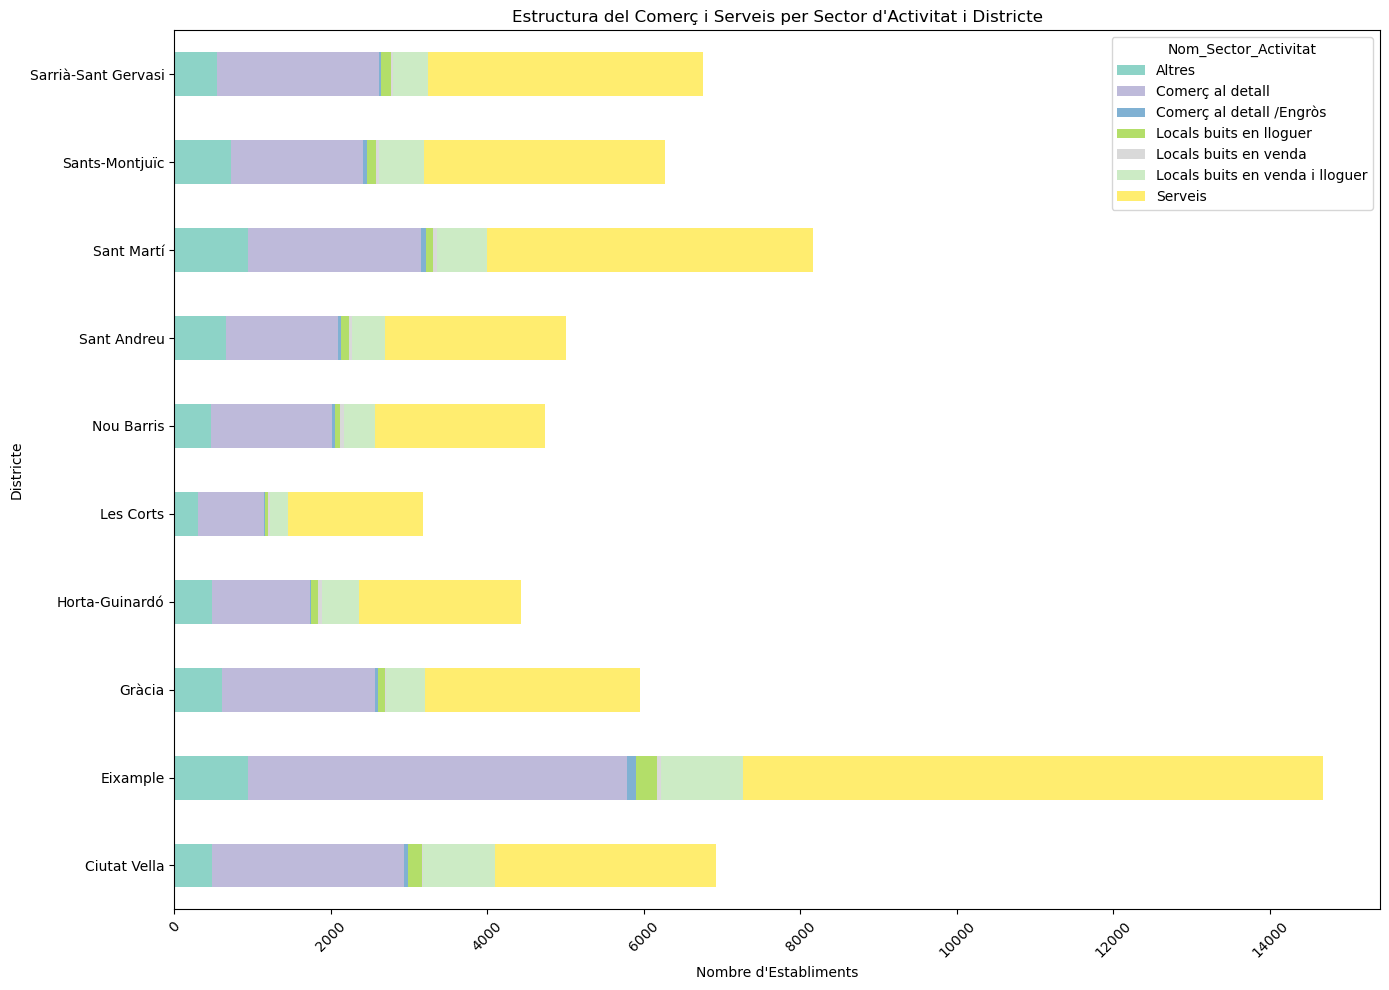

In [136]:
df_sector_districte = df_net[['Nom_Districte', 'Nom_Sector_Activitat']]

# Crear una taula de contingència per comptar la quantitat d'establiments per districte i sector d'activitat
df_sector_districte_count = df_sector_districte.groupby(['Nom_Districte', 'Nom_Sector_Activitat']).size().unstack(fill_value=0)

# Crear la gràfica de barres apilades
df_sector_districte_count.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='Set3')

# Personalitzar la gràfica
plt.title('Estructura del Comerç i Serveis per Sector d\'Activitat i Districte')
plt.xlabel('Nombre d\'Establiments')
plt.ylabel('Districte')
plt.xticks(rotation=45)
# plt.legend(title='Sector d\'Activitat', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


_Podem apreciar que el sector Serveis, sigui quin sigui el districte, predomina._

In [155]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66088 entries, 0 to 66087
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_Global                 66088 non-null  object        
 1   Codi_Principal_Activitat  66088 non-null  int64         
 2   Nom_Principal_Activitat   66088 non-null  object        
 3   Codi_Sector_Activitat     66088 non-null  int64         
 4   Nom_Sector_Activitat      66088 non-null  object        
 5   Codi_Grup_Activitat       66088 non-null  int64         
 6   Nom_Grup_Activitat        66088 non-null  object        
 7   Codi_Activitat_2022       66088 non-null  int64         
 8   Nom_Activitat             66088 non-null  object        
 9   Codi_Activitat_2016       66088 non-null  object        
 10  Nom_Local                 66088 non-null  object        
 11  SN_Oci_Nocturn            66088 non-null  int64         
 12  SN_Coworking      

In [205]:
from scipy.stats import chi2_contingency

# Funció per calcular l'índex de Cramér's V
def cramers_v(chi2, n, table):
    r, k = table.shape
    return np.sqrt(chi2 / (n * min(r - 1, k - 1)))

# Seleccionar automàticament les columnes de tipus 'object' o 'category' (categoriques)
categorical_columns = df_net.select_dtypes(include=['object']).columns

# Comprovar el nombre de categories per cada columna
category_counts = df_net[categorical_columns].nunique()

# Filtrar les columnes amb un nombre raonable de categories
max_categories = 20  # Limitar a columnes amb un màxim de 20 categories
filtered_columns = category_counts[category_counts <= max_categories].index

# Mostrar les columnes que passin el filtre
print("Columnes amb menys de 20 categories:", filtered_columns)

# Comprovar si hi ha valors NaN i tractar-los (substituir-los per 'Desconegut')
df_net[filtered_columns] = df_net[filtered_columns].fillna('Desconegut')

# Crear un diccionari per emmagatzemar els resultats de correlació
correlations = {}

# Iterar per totes les parelles de columnes categòriques
for col1 in filtered_columns:
    for col2 in filtered_columns:
        if col1 != col2:  # Evitar comparar la mateixa columna amb si mateixa
            # Crear taula de contingència per les dues columnes
            contingency_table = pd.crosstab(df_net[col1], df_net[col2])
            
            # Comprovar si la taula de contingència té valors vàlids (ha de ser una taula 2D)
            if contingency_table.size > 0:
                # Aplicar la prova de chi-quadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                
                # Calcular l'índex de Cramér's V
                cramers_v_value = cramers_v(chi2, df_net.shape[0], contingency_table)
                
                # Guardar els resultats en el diccionari
                correlations[(col1, col2)] = {
                    'p-value': p,
                    'Cramér\'s V': cramers_v_value
                }

# Mostrar els resultats de la correlació
for key, value in correlations.items():
    print(f"Correlació entre {key[0]} i {key[1]}: p-value = {value['p-value']}, Cramér's V = {value['Cramér\'s V']}")


Columnes amb menys de 20 categories: Index(['Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat',
       'Planta', 'Nom_Districte'],
      dtype='object')


ZeroDivisionError: float division by zero